## 다중 회귀 모델

In [4]:
# 7장 머신러닝
# 데이터 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv(r"/content/drive/MyDrive/BDA/part3/auto-mpg.csv", header=None)

df.columns=["mpg","cylinders","displacement","horsepower","weight",
            "acceleration","model year","origin","name"]

print(df.head())
print("\n")

# Ipython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option("display.max_columns", 10) # 출력할 열의 최대 개수
print(df.head())
# %%
# 데이터 탐색
# 데이터 자료형 확인
print(df.info())
print("\n")

# 데이터 통계 요약 정보 확인
print(df.describe())


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

In [17]:
# %%
# 열 선택
new_df = df.iloc[:, [0,1,3,4]]
# 변수 구분
# 독립 변수
X = new_df.iloc[:, 1:]
# 종속 변수
y = new_df.mpg
# 훈련, 테스트 데이터 분할 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print("훈련 데이터: ", X_train.shape)
print("검증 데이터: ", X_test.shape)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [19]:
# %%
# 알고리즘
from sklearn.linear_model import LinearRegression
# 모형 객체
mr = LinearRegression()
# 모형 학습 = 훈련
mr.fit(X_train, y_train)

# 모형 평가 = 테스트
mr.score(X_test, y_test)

# 회귀계수, 절편
print(mr.coef_)
print(mr.intercept_)


[-0.60691288 -0.03714088 -0.00522268]
46.414351269634025


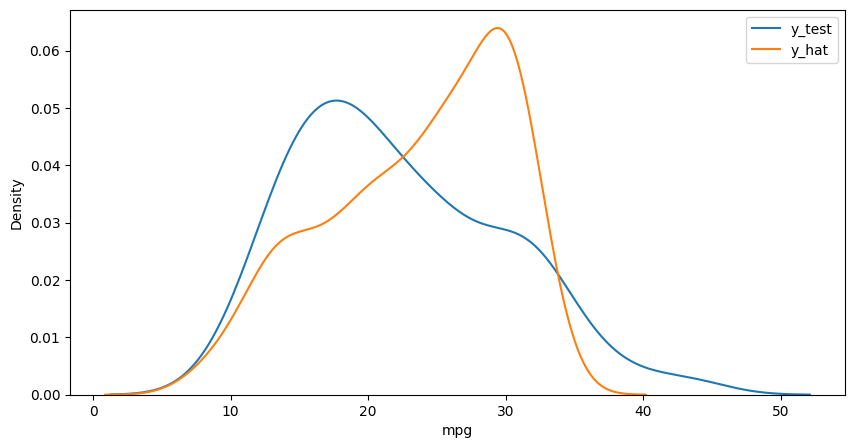

In [23]:
# %%
# 예측값
y_hat_test = mr.predict(X_test)

# 비교
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test,label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_hat",ax=ax1)
plt.legend()
plt.show()

# 분류 모델

##KNN

In [73]:
# %%
# 분류
# KNN 분류 알고리즘

# [step 1] 데이터 준비 - seaborn에서 제공하는 titanic 데이터셋 가져오기

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset("titanic")

# 데이터 살펴보기
print(df.head())

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option("display.max_column",15)
print(df.head())

# [step 2] 데이터 탐색/전처리

# 데이터 자료형 확인
print(df.info())

print(df.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  

In [74]:
# %%
# 데이터 전처리
# deck 널값이 너무 많음
# NaN 값이 많은 deck 열 삭제, embarked와 내용이 겹치는 embark_town 열 삭제
rdf=df.drop(["deck","embark_town"],axis=1)
print(rdf.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [75]:
# %%
# age 열에 나이 데이터가 없는 모든 행 삭제 - age 열 (891개 중 177개의 NaN값)
rdf = rdf.dropna(subset=["age"],how="any",axis=0)
print(len(rdf))


714


In [134]:
# %%
# embarked 널값 확인
rdf.embarked.value_counts(dropna=True)

S    556
C    130
Q     28
Name: embarked, dtype: int64

In [77]:
# %%
# embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq=rdf["embarked"].value_counts(dropna=True).idxmax()
print(most_freq)

print(rdf.describe(include="all"))

rdf["embarked"].fillna(most_freq,inplace=True)

S
          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000  

In [81]:
# %%
# [Step 3] 분석에 사용할 속성 선택
# 분석에 활용할 열(속성) 선택
rdf = rdf[["survived","pclass","sex","age","sibsp","parch","embarked"]]
print(rdf.head())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


In [82]:
# %%
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
# 더미 변수
onehot_sex = pd.get_dummies(rdf["sex"])

# 데이터셋 + 더미 변수
rdf=pd.concat([rdf,onehot_sex],axis=1)
onehot_embarked = pd.get_dummies(rdf["embarked"],prefix="town")
rdf = pd.concat([rdf,onehot_embarked],axis=1)
rdf.drop(["sex","embarked"],axis=1,inplace=True)
print(rdf.head())

# # 더미 변수
# sex_dum = pd.get_dummies(new_df.sex)
# embarked_dum = pd.get_dummies(new_df.embarked)

# # 더미 변수 만들 때 사용했던 변수 제거(sex, embarked)
# new_df = new_df.drop(["sex","embarked"],axis=1)
# new_df.head()

# #데이터셋 + 더미 변수
# new_df = pd.concat([new_df,sex_dum],axis=1)
# new_df = pd.concat([new_df,embarked_dum],axis=1)
# new_df.head()

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


In [83]:
# %%

# [Step 4] 훈련/검증 데이터 분할
# [Step 4] 데이터셋 구분 - 훈련용(train data) / 검증용(test data)

# 속성(변수) 선택
X=rdf[["pclass","age","sibsp","parch","female","male",
       "town_C","town_Q","town_S"]] # 설명 변수 X
y=rdf["survived"]                   # 예측 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print("train data: ", X_train.shape)
print("test data: ", X_test.shape)

train data:  (499, 9)
test data:  (215, 9)


In [84]:
# %%
# [Step 5] 모형 학습 및 검증
# KNN 분류 모형 - sklearn 사용

from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성(k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측(분류)
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [135]:
# %%
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

#모형 성능 평가 - 평가 지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)


[[127   4]
 [  2  72]]
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [144]:
#%%
# survived = 0 예측
# 정확도
a = 114 / (114 + 29)

# 재현율
b = 114 / (114 + 11)

# f1 score
print((2*a*b) / (a+b))
knn

0.8507462686567164


KNeighborsClassifier()

In [145]:
#%%
# survived = 1 예측
# 정확도
a = 61 / (61 + 11)

# 재현율
b = 61 / (61 + 29)

# f1 score
print((2*a*b) / (a+b))

0.7530864197530864


##DT

In [154]:
# %%
# 3-3 Decision Tree
import pandas as pd
import numpy as np

# [Step 1] 데이터 준비/기본 설정

# Breast Cancer 데이터셋 가져오기(출처: UCI MI, Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ["id","clump","cell_size","cell_shape","adhesion","epithlial",
              "bare_nuclei", "chromatin","normal_nucleoli", "mitoses", "class"]

# Ipython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option("display.max_column",15)

# [Step 2] 데이터 탐색

# 데이터 살펴보기
print(df.head())

# 데이터 자료형 확인
print(df.info())

# 데이터 통계 요약 정보 확인
df.describe()

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clum

,id,clump,cell_size,cell_shape,adhesion,epithlial,chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [156]:
# %%
# bare_nuclei 열의 자료형 변경(문자열 -> 숫자)
print(df["bare_nuclei"].unique()) # bare_nuclei 열의 고유값 확인

df["bare_nuclei"].replace("?",np.nan,inplace=True) # ?을 np.nan으로 변경
df.dropna(subset=["bare_nuclei"],axis=0,inplace=True) #누락 데이터 행 삭제
df["bare_nuclei"]= df["bare_nuclei"].astype("int") # 문자열을 정수형으로 변환

print(df.describe()) # 데이터 통계 요약 정보 확인

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.00

In [157]:
# %%
# [Step 3] 데이터셋 구분 - 훈련용(traina data)/검증용(test data)

# 속성 (변수) 선택
X=df[["clump","cell_size","cell_shape","adhesion","epithlial",
              "bare_nuclei", "chromatin","normal_nucleoli", "mitoses"]] # 설명 변수 X
y=df["class"] # 예측 변수 Y

# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분 (7:3 비율)
# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print("train data: ", X_train.shape)
print("test data: ", X_test.shape)

train data:  (478, 9)
test data:  (205, 9)


In [158]:
# %%
# 의사 결정 나무
# 모형 학습 및 검증
# [Step 4] Decision Tree 분류 모형 - sklearn 사용
from sklearn import tree

# 모형 객체 생성(criterion="entropy" 적용)
tree_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

# train data를 가지고 모형 학습
tree_model.fit(X_train,y_train)

# test data를 가지고 y_hat 예측(분류)
y_hat = tree_model.predict(X_test)  # 2 : benign(양성), 4: malignant(악성)

print(y_hat[0:10])
print(y_test.values[0:10])  

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [159]:
# %%
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)

#모형 성능 평가 - 평가 지표 계산
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[127   4]
 [  2  72]]
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



##DT2 (시각화)

In [167]:
# 데이터 준비
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data", header = None)
# 열 이름 지정
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 
              'epithlial', 'bare_nuclei', 'chromatin', 
              'normal_nucleoli', 'mitoses', 'class']
df.head()
# 유방암 데이터

df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


,id,clump,cell_size,cell_shape,adhesion,epithlial,chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [168]:
# 데이터 전처리
# bare_nuclei
df.bare_nuclei.unique()

df[df["bare_nuclei"] == "?"]

df.bare_nuclei.replace("?", np.nan, inplace = True)

df.dropna(subset = "bare_nuclei", axis = 0, inplace = True)

df.bare_nuclei = df.bare_nuclei.astype("int")

type(df.bare_nuclei[0])

df.bare_nuclei.describe()

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: bare_nuclei, dtype: float64

In [169]:
# 훈련, 테스트 데이터 분할
# 독립변수
X = df.iloc[:,1:10]
# 종속변수
y = df["class"]
# 독립 변수 열 이름 저장 => 의사결정나무 그릴 때 사용 예정
colname = X.columns

# 표준화
ss = preprocessing.StandardScaler()
X = ss.fit(X).transform(X)

# 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state=10)
print(X_train.shape, X_test.shape)

(478, 9) (205, 9)


In [170]:
# 의사결정나무
from sklearn import tree
# 모델 객체
dt = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
# 모형 학습
dt.fit(X_train, y_train)

# 모형 평가
# 예측(분류)
y_pred = dt.predict(X_test)
print(y_test)
print(y_pred)

dt_cm = metrics.confusion_matrix(y_test, y_pred)
dt_cm

dt_cm_report = metrics.classification_report(y_test, y_pred)
print(dt_cm_report)

286    4
272    4
455    4
457    4
247    4
      ..
491    4
173    4
217    2
155    4
639    2
Name: class, Length: 205, dtype: int64
[4 4 4 4 4 4 2 2 4 4 4 2 2 4 4 2 2 4 2 4 2 2 2 2 4 2 2 2 2 2 2 4 4 4 2 4 4
 4 2 2 4 2 4 2 4 2 4 2 2 2 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2
 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 4
 2 2 4 2 2 4 2 2 4 2 4 2 4 4 4 4 2 4 2 2 2 2 2 4 4 4 4 2 4 4 2 2 2 4 4 2 4
 2 2 2 4 2 2 2 4 4 2 2 2 2 2 4 2 4 4 2 4 4 2 2 4 4 2 2 4 2 2 2 2 4 2 2 2 4
 2 2 2 2 2 4 2 2 4 2 4 2 4 2 4 4 4 2 4 2]
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [171]:
# 양성클래스 2 = benign cancer = 양성암
# precision
a = 127 / (127 + 2);print(a)
# recall
b = 127 / (127 + 4);print(b)
# f-1 score
(2*a*b)/(a+b)

# 양성클래스 4 = malignant cancer = 악성암
# precision
a = 72 / (72 + 4);print(a)
# recall
b = 72 / (72 + 2);print(b)
# f-1 score
(2*a*b)/(a+b)

0.9844961240310077
0.9694656488549618
0.9473684210526315
0.972972972972973


0.9599999999999999

0.929697217101106

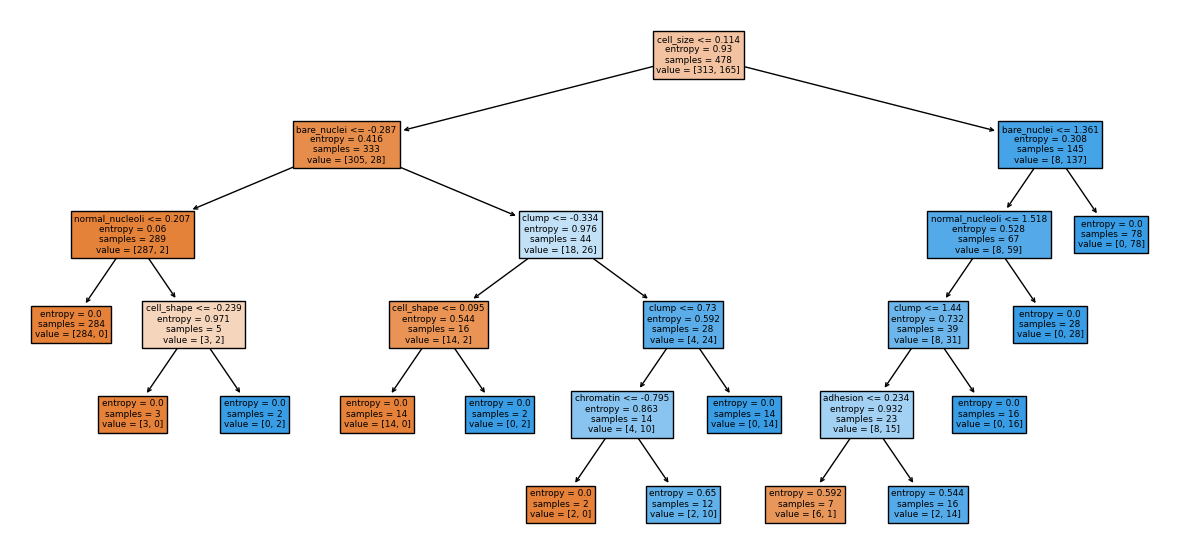

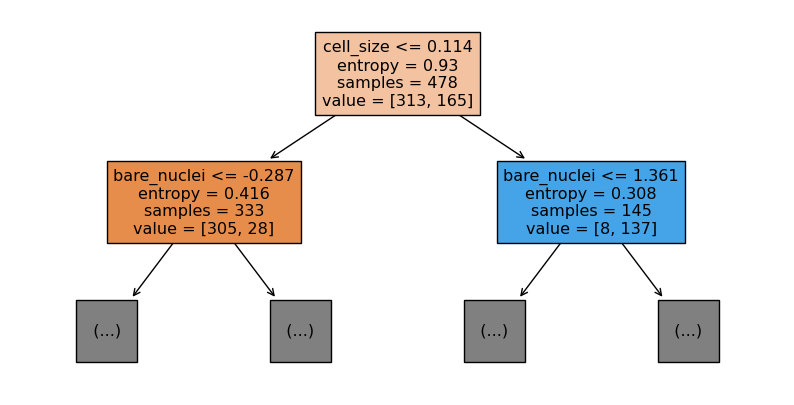

In [173]:
# 시각화
from sklearn.tree import plot_tree
plt.figure(figsize = (15,7))
plot_tree(dt, filled = True, feature_names = colname.values)

plt.figure(figsize = (10,5))
plot_tree(dt, max_depth = 1, filled = True, feature_names = colname.values)

# 엔트로피 불순도
import math
neg_rate = 313/478; pos_rate = 165/478
-neg_rate*math.log(neg_rate, 2)-pos_rate*math.log(pos_rate, 2)

0.45206666549955354

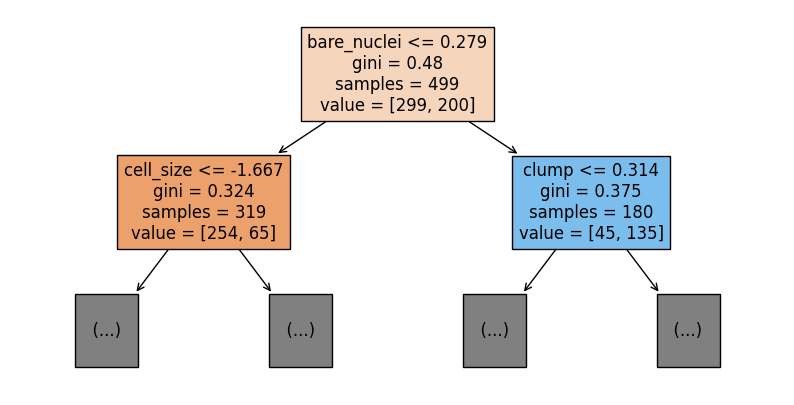

In [182]:
# 모델 객체
dt = tree.DecisionTreeClassifier(max_depth = 5)
# 모형 학습
dt.fit(X_train, y_train)

plt.figure(figsize = (10,5))
plot_tree(dt, max_depth = 1, filled = True, feature_names = colname.values)

# 지니 불순도
neg_rate = 313/478; pos_rate = 165/478
1 - (neg_rate**2 + pos_rate**2)


## SVM

In [121]:
# %%
# 3-2 SVM 모형
import pandas as pd
import seaborn as sns

# [Step 1] 데이터 준비/기본 설정
# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset("titanic")

# Ipython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option("display.max_column",15)

# [Step 2] 데이터 탐색/전처리

# NaN 값이 많은 deck 열 삭제, embarked와 내용이 겹치는 embaark_town 열 삭제
rdf = df.drop(["deck","embark_town"],axis=1)

# age 열에 나이 데이터가 없는 모든 행 삭제 - age 열 (891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=["age"],how="any",axis=0)

# embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf["embarked"].value_counts(dropna=True).idxmax()
rdf["embarked"].fillna(most_freq,inplace=True)

In [122]:
# %%
# [Step 3] 분석에 사용할 속성 선택
# 분석에 활용할 열(속성) 선택
rdf = rdf[["survived","pclass","sex","age","sibsp","parch","embarked"]]
print(rdf.head())


   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


In [123]:
# %%
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(rdf["sex"])
rdf=pd.concat([rdf,onehot_sex],axis=1)

onehot_embarked = pd.get_dummies(rdf["embarked"],prefix="town")
rdf=pd.concat([rdf,onehot_embarked],axis=1)

# [Step 4] 데이터셋 구분 - 훈련용(traina data)/검증용(test data)

# 속성 (변수) 선택
X=rdf[["pclass","age","sibsp","parch","female","male",
       "town_C","town_Q","town_S"]] # 독립 변수 X
y=rdf["survived"]                   # 종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

print("train data 개수: ", X_train.shape)
print("test data 개수: ", X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


In [124]:
# %%
# [Step 5] SVM 분류 모형 - sklearn 사용

# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성(kernel="rbf" 적용)
svm_model = svm.SVC(kernel="rbf")

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)

# test data를 가지고 y_hat 예측(분류)
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [125]:
# %%
# 모형 성능 평가 - Confusion Matrix 계산
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)

# 모형 성능 평가 - 평가 지표 계산
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



## 결정 트리 구조

In [126]:
# %%
# 3-3 Decision Tree
import pandas as pd
import numpy as np

# [Step 1] 데이터 준비/기본 설정

# Breast Cancer 데이터셋 가져오기(출처: UCI MI, Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ["id","clump","cell_size","cell_shape","adhesion","epithlial",
              "bare_nuclei", "chromatin","normal_nucleoli", "mitoses", "class"]

# Ipython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option("display.max_column",15)

# [Step 2] 데이터 탐색

# 데이터 살펴보기
print(df.head())

# 데이터 자료형 확인
print(df.info())

# 데이터 통계 요약 정보 확인
df.describe()


        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clum

,id,clump,cell_size,cell_shape,adhesion,epithlial,chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [128]:
# %%
# bare_nuclei 열의 자료형 변경(문자열 -> 숫자)
print(df["bare_nuclei"].unique()) # bare_nuclei 열의 고유값 확인

df["bare_nuclei"].replace("?",np.nan,inplace=True) # ?을 np.nan으로 변경
df.dropna(subset=["bare_nuclei"],axis=0,inplace=True) #누락 데이터 행 삭제
df["bare_nuclei"]= df["bare_nuclei"].astype("int") # 문자열을 정수형으로 변환

print(df.describe()) # 데이터 통계 요약 정보 확인

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.00

In [130]:
# %%
# [Step 3] 데이터셋 구분 - 훈련용(traina data)/검증용(test data)

# 속성 (변수) 선택
X=df[["clump","cell_size","cell_shape","adhesion","epithlial",
              "bare_nuclei", "chromatin","normal_nucleoli", "mitoses"]] # 설명 변수 X
y=df["class"] # 예측 변수 Y

# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분 (7:3 비율)
# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print("train data: ", X_train.shape)
print("test data: ", X_test.shape)

train data:  (478, 9)
test data:  (205, 9)


In [131]:
# %%
# 모형 학습 및 검증
# [Step 4] Decision Tree 분류 모형 - sklearn 사용
from sklearn import tree

# 모형 객체 생성(criterion="entropy" 적용)
tree_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

# train data를 가지고 모형 학습
tree_model.fit(X_train,y_train)

# test data를 가지고 y_hat 예측(분류)
y_hat = tree_model.predict(X_test)  # 2 : benign(양성), 4: malignant(악성)

print(y_hat[0:10])
print(y_test.values[0:10])  

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [132]:
# %%
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)

#모형 성능 평가 - 평가 지표 계산
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[127   4]
 [  2  72]]
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



## SVM2 (시각화에 필요한 자료)

In [175]:
# 데이터 준비
df = sns.load_dataset("titanic")

new_df = df.drop(["deck","embark_town"], axis = 1)
new_df = new_df.dropna(subset = "age", axis = 0)
new_df.head()

mode = new_df.embarked.value_counts(dropna=False).idxmax()
new_df.fillna(mode, inplace = True)

new_df = new_df.iloc[:,:8]
new_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [176]:
# 더미 변수
sex_dum = pd.get_dummies(new_df.sex)
embarked_dum = pd.get_dummies(new_df.embarked)

# 더미 변수 만들 때 사용했던 변수 제거(sex, embarked)
new_df = new_df.drop(["sex","embarked"], axis = 1)
new_df.head()

# 데이터셋 + 더미변수
new_df = pd.concat([new_df, sex_dum], axis = 1)

new_df = pd.concat([new_df, embarked_dum], axis = 1)
new_df.head()

,survived,pclass,age,sibsp,parch,fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [177]:
# 훈련, 테스트 데이터 분할
X = new_df.iloc[:,1:]
y = new_df.survived
# 표준화
ss = preprocessing.StandardScaler()
X = ss.fit(X).transform(X)

# 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state=10)
print(X_train.shape, X_test.shape)

from sklearn import svm

(499, 10) (215, 10)


In [178]:
# 모형 객체
svm_m = svm.SVC(kernel = 'rbf')

# 모형 학습
svm_m.fit(X_train, y_train)

# 모형 평가
y_pred = svm_m.predict(X_test)
print(y_test)
print(y_pred)


728    0
555    0
426    1
278    0
617    0
      ..
365    0
811    0
749    0
622    1
273    0
Name: survived, Length: 215, dtype: int64
[0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [179]:
# confusion matrix
svm_cm = metrics.confusion_matrix(y_test, y_pred)
svm_cm

svm_cm_report = metrics.classification_report(y_test, y_pred)
print(svm_cm_report)


              precision    recall  f1-score   support

           0       0.78      0.96      0.86       125
           1       0.92      0.62      0.74        90

    accuracy                           0.82       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.84      0.82      0.81       215

